
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 1</p>
## <p style="text-align: center;">Total points: 75</p>
## <p style="text-align: center;">Due: Tuesday, September 13 submitted via Canvas by 11:59 p</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Applications of machine learning (10 pts)

Read the [article](http://www.datasciencecentral.com/profiles/blogs/20-data-science-systems-used-by-amazon-to-operate-its-business) "21 data science systems used by Amazon to operate its business" and pick any two of the data science systems used by Amazon according to this blog.

(5 pts each) For each of these two system you have chosen:

What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...)? Speculate on what kind of data may be needed and how the results can be useful to the company.


## Answer




1. Recommendation engine
Clustering is involved in this recommendation engine system.
Data maybe needed: Purchase history, browsing histroy, product assocation, customer profile.  
Usage to the company: The recommendation engine system can provide customers with the fittest products based on their history purchasing and browsing history as well as customers profile, customers can easily find out what they want to buy and the assocation between different product can also boost the sales revenue.

2. Fraud detection
Classification is involved in this fraud detection system.
Data maybe needed: Transaction history, transaction detail, customer profile, store profile.
Usage to the company: The fraud detection system can help company prevent fraud and protect their customers money. On one hand, company can reduce the cost due to the fraud transaction and on the other hand, customers are willing to purchase if the transaction environment is safe, which can increase the revenue.

# Question 2: Maximum likelihood estimate (10 pts)

Suppose a manager at an internet sales company wants to estimate how fast his salesperson is generating successful leads. Instead of recording the time for each lead, the time taken to generate the next 5 leads are recorded, i.e., there is one recording (denoting the elapsed time) for every 5 consecutive leads. For a specific salesperson, the time intervals recorded are {1,3,1.5,4,2,7,1.2,2,4,3.1} hours. 

A statistician suggests that if these time intervals are assumed to arise by i.i.d. sampling from the following distribution:
$$ p(t) = \frac{1}{C \times \theta^{5}}t^{4}exp^{-\frac{t}{\theta}},$$
(where C is a normalizing constant). Therefore, if $\theta$ can be estimated, then he can provide detailed information
about the lead generation process, including average rates, variances etc.

Find the Maximum Likelihood estimate for $\theta$ based on the recorded observations.


## Answer

Likelihood Function ($L(\theta)$) takes the product of p(t) for all t:
$$ L(\theta)= \Pi \frac{ t^{4}}{C \times \theta^{5}}exp^{-\frac{ti}{\theta}},$$

Take log for $ L(\theta)$:

$$ ln(L(\theta)) = \sum_{i=1}^{10} ln(\frac{ t_i^{4}}{C \times \theta^{5}}) - \frac{ \sum_{i=1}^{10} t_i}{\theta} = ln(\sum_{i=1}^{10} t_i^{4})-ln(C \times \theta^{5})- \frac{\sum_{i=1}^{10} t_i}{\theta} $$

Take partial derivative with respect to $\theta $:

$$ d(ln L(\theta))/d\theta = \frac{\sum_{i=1}^{10} t_i}{\theta^{2}} - \frac{50}{\theta} $$

Set to 0:

$$ \theta = \frac{\sum_{i=1}^{10} t_i}{50} = \frac{28.8}{50} =0.576$$

# Question 3: Multiple Linear Regression in Python (25 pts)

Use the following code to import the boston housing dataset and linear models in python.



In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
%pylab inline
boston = datasets.load_boston()

X = boston.data
y = boston.target

Populating the interactive namespace from numpy and matplotlib


The dataset information can be found [here](http://scikit-learn.org/stable/datasets/index.html#boston-house-prices-dataset).

a. (3 pts) Print the shape (number of rows and columns) of the feature matrix, and print the first 5 rows.

b.  (6 pts) Using ordinary least squares, fit a multiple linear regression (MLR) on all the feature variables using the entire dataset (506 rows). Report the regression coefficient of each input feature and evaluate the model using mean squared error (MSE).  Example of ordinary least squares in Python is shown in Section 1.1.1 of http://scikit-learn.org/stable/modules/linear_model.html.

c.  (6 pts) Split the data into a training set and a test set.  Use the first 400 rows for training set and remaining rows for test set.  Fit an MLR using the training set.  Evaluate the trained model using the training set and the test set, respectively.  Compare the two MSE values thus obtained.

d.  (6 pts) Do you think your MLR model is reasonable for this problem? You may look at the distribution of residuals to provide an informed answer.

e. (5 pts) Use the following code to add new features to the dataset.  You should have 26 variables now.  Note that this code adds one squared term for each variable; in practice one may introduce only a few terms based on domain knowledge or experimentation.  Repeat (c) and report the MSE values of the training set and the test set, respectively.

In [2]:
#X = np.concatenate((X, np.square(X)), axis=1)

## Answer



In [3]:
#(a)
import pandas as pd
df = pd.DataFrame(X)
print 'The shape of the feature matrix is', X.shape
print
print df[:5]

The shape of the feature matrix is (506, 13)

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [4]:
#(b)
reg = linear_model.LinearRegression()
reg.fit(X,y)
print 'The regression coefficient is', reg.coef_
y_pred = reg.predict(X)
print 'MSE =', mean_squared_error(y,y_pred)

The regression coefficient is [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
MSE = 21.8977792177


In [5]:
#(c)
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print 'MSE_train =', mean_squared_error(y_train,y_pred_train)
print 'MSE_test =', mean_squared_error(y_test,y_pred_test)
print 'Test data MSE is bigger than training data MSE, which makes sense because we train the model using training dataset'

MSE_train = 22.3052255842
MSE_test = 38.1643386432
Test data MSE is bigger than training data MSE, which makes sense because we train the model using training dataset


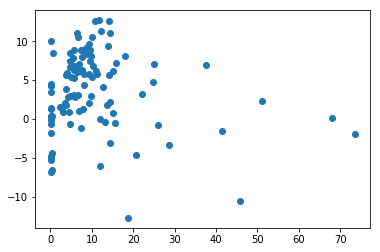

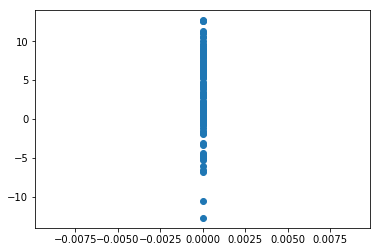

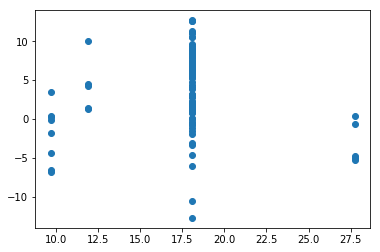

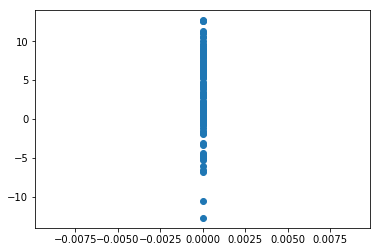

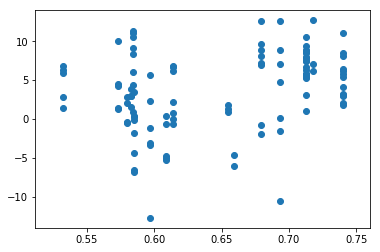

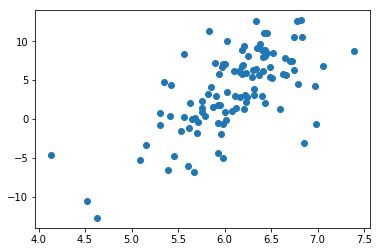

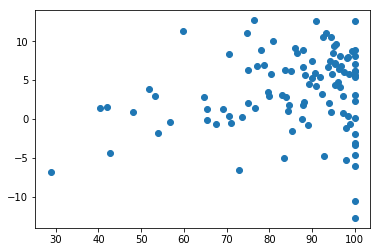

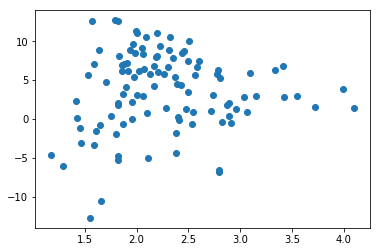

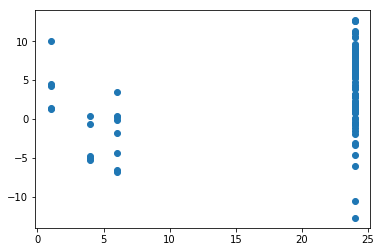

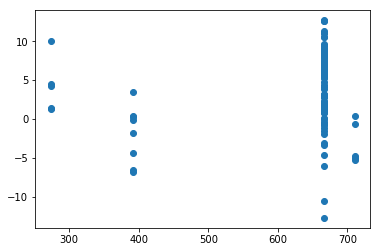

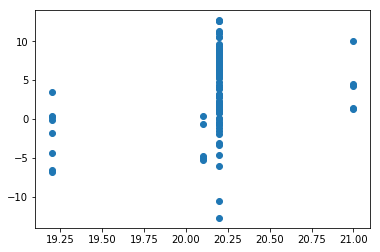

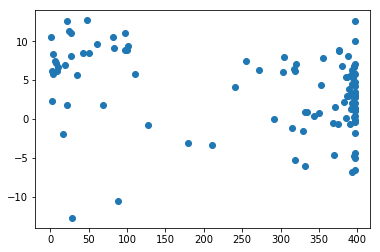

In [6]:
#(d)
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(0,12):
    plt.scatter(pd.DataFrame(X_test)[i], reg.predict(X_test) - y_test)
    plt.show()

#### The plots show that MLR model is not reasonable for this problem because residual are not distributed around 0 and not constant.

In [7]:
#(e)
X = np.concatenate((X, np.square(X)), axis=1)
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print 'MSE_train =', mean_squared_error(y_train,y_pred_train)
print 'MSE_test =', mean_squared_error(y_test,y_pred_test)

MSE_train = 14.4689173781
MSE_test = 32.9465487206


# Question 4: Ridge and Lasso Regression (25 points)


Using the same boston data from before, in this question you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (8pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (7pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (5pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 26 variables. What do you observe from these coefficients? (5pts)

## Answer



In [9]:
#(1)
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.cross_validation import KFold
from sklearn.model_selection import GridSearchCV


###Lasso
alphas =  10**np.linspace(10,-2,100)*0.5
alpha_mse = []
best_mse = 10000000
best_alpha = 0
for i in alphas:
    kf = KFold(len(X_train), n_folds=5)
    error = []
    for train_index, test_index in kf:
        X_train_cv = X[train_index]
        y_train_cv = y[train_index]
        X_test_cv = X[test_index]
        y_test_cv = y[test_index]
        lasso = Lasso(alpha = i)
        lasso.fit(X_train_cv, y_train_cv)
        residuals = (lasso.predict(X_test_cv) - y_test_cv)**2
        error.append(sum(residuals)/len(residuals))
    MSE = sum(error)/len(error)
    if MSE<best_mse:
        best_mse = MSE
        best_alpha = i
    alpha_mse.append(sum(error)/len(error))
print "Best alpha =", best_alpha 
print "MSE = ", best_mse


/Users/LJY/Documents/Python2.7/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/LJY/Documents/Python2.7/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best alpha = 0.020185086293
MSE =  10.9032117642


In [10]:
###Ridge
alphas =  10**np.linspace(10,-2,100)*0.5
alpha_mse = []
best_mse = 10000000
best_alpha = 0
for i in alphas:
    kf = KFold(len(X_train), n_folds=5)
    error = []
    for train_index, test_index in kf:
        X_train_cv = X[train_index]
        y_train_cv = y[train_index]
        X_test_cv = X[test_index]
        y_test_cv = y[test_index]
        ridge = linear_model.Ridge(alpha = i)
        ridge.fit(X_train_cv, y_train_cv)
        residuals = (ridge.predict(X_test_cv) - y_test_cv)**2
        error.append(sum(residuals)/len(residuals))
    MSE = sum(error)/len(error)
    if MSE<best_mse:
        best_mse = MSE
        best_alpha = i
    alpha_mse.append(sum(error)/len(error))
print "Best alpha =", best_alpha 
print "MSE = ", best_mse


Best alpha = 21.6438064054
MSE =  10.5498333111


In [11]:
#(2)
ridge_coef = []
lasso_coef = []
for i in alphas:
    ridge = linear_model.Ridge(alpha = i)
    ridge.fit(X_train, y_train)
    ridge_coef.append(ridge.coef_)
    
    lasso = linear_model.Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    lasso_coef.append(lasso.coef_)

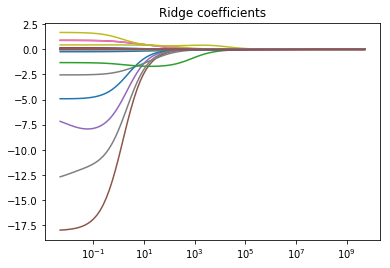

In [12]:
####plot ridge
ax = plt.gca()
ax.plot(alphas, ridge_coef)

ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1]) 
plt.title('Ridge coefficients')
plt.show()

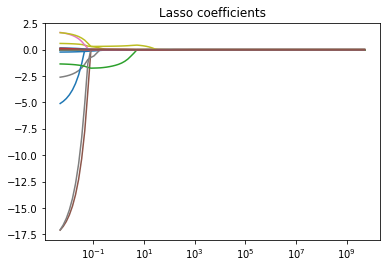

In [13]:
ax = plt.gca()
ax.plot(alphas, lasso_coef)

ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1]) 
plt.title('Lasso coefficients')
plt.show()

#### The plots show that with the increase of value of the regularization parameter lambda, the coefficients are tends to 0.

In [14]:
#(3)
#Linear Regression
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_linear_pred = reg.predict(X_test)
print 'MSE_Linear =', mean_squared_error(y_test,y_linear_pred)

#Ridge
ridge = linear_model.Ridge(alpha = 21.64)
ridge.fit(X_train,y_train)
y_ridge_pred = ridge.predict(X_test)
print 'MSE_Ridge =', mean_squared_error(y_test, y_ridge_pred)

#Lasso
lasso = linear_model.Lasso(alpha = 0.02)
lasso.fit(X_train,y_train)
y_lasso_pred = lasso.predict(X_test)
print 'MSE_Lasso =', mean_squared_error(y_test, y_lasso_pred)

MSE_Linear = 17.2979743299
MSE_Ridge = 20.5569429934
MSE_Lasso = 17.7958442159


In [15]:
#(4)
lasso_cv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 10000)
lasso_cv.fit(X_train, y_train)
lasso = linear_model.Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print 'Best lambda =', lasso_cv.alpha_
print 
print 'Coefficient =', lasso.coef_
print
print 'All of the un-squared coefficents are shrinked to 0, which means there are polynomial relationship instead of linear relationship between y and X '

Best lambda = 664.047834637

Coefficient = [ -0.00000000e+00   0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -0.00000000e+00   4.68821941e-04  -0.00000000e+00
   0.00000000e+00  -0.00000000e+00   0.00000000e+00  -5.84526026e-05
  -0.00000000e+00   0.00000000e+00  -1.95225581e-05  -0.00000000e+00
   3.24068444e-05  -2.91050622e-03]

All of the un-squared coefficents are shrinked to 0, which means there are polynomial relationship instead of linear relationship between y and X 


# Question 5  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer



1. All the variables are idenpendent so there is no interaction between any two variables.
2. The realtionship between y and X is purely linear.
